http://ithelp.ithome.com.tw/articles/10187314

# 前言
經過三天的監督式學習（迴歸與分類）實作，稍微變換一下心情來練習非監督式學習中相當重要的分群演算法。

仔細回想一下，至今練習過的冰紅茶銷量，蛋糕店月銷量，鐵達尼克號乘客的存活與否以及鳶尾花的品種，訓練資料都是有標籤（答案）的，

而非監督式學習與監督式學習最大的不同之處就在於它的訓練資料是沒有標籤（答案）的。

分群演算法的績效衡量簡單明暸：
>組間差異大，組內差異小。
>而所謂的差異指的就是觀測值之間的距離遠近作為衡量，
>最常見還是使用歐氏距離（Euclidean distance）。
>既然我們又是以距離作為度量，在資料的預處理程序中，與 k-Nearest Neighbors 分類器一樣
>我們必須將所有的數值型變數標準化（Normalization），避免因為單位不同，在距離的計算上失真。

我們今天要使用熟悉的鳶尾花資料，採用花瓣（Petal）的長和寬跟花萼（Sepal）的長和寬來練習兩種分群演算法，

分別是 K-Means 與 Hierarchical Clustering。

# K-Means

K-Means 演算法可以非常快速地完成分群任務，

但是如果觀測值具有雜訊（Noise）或者極端值，

其分群結果容易被這些雜訊與極端值影響，適合處理分布集中的大型樣本資料。

我們使用 sklearn.cluster 的 KMeans() 方法。

In [8]:
from sklearn import cluster, datasets

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# KMeans 演算法
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(iris_X)

# 印出分群結果
cluster_labels = kmeans_fit.labels_
print("分群結果：")
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print("真實品種：")
print(iris_y)

分群結果：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
---
真實品種：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 績效

分群演算法的績效可以使用 Silhouette 係數或 

WSS（Within Cluster Sum of Squares）/BSS（Between Cluster Sum of Squares）。

我們使用 sklearn.metrics 的 silhouette_score() 方法，這個數值愈接近 1 表示績效愈好，反之愈接近 -1 表示績效愈差。

In [9]:
from sklearn import metrics
# 印出績效
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.552591944531


# 如何選擇 k

隨著 k 值的增加，K-Means 演算法的績效一定會愈來愈好，當 k = 觀測值數目的時候，

我們會得到一個組間差異最大，組內差異最小的結果，但這不是我們想要的，

實務上我們讓程式幫忙選擇一個適合的 k。

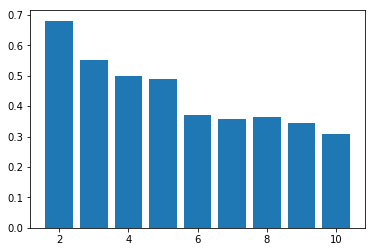

[0.680813620278794, 0.5525919445309031, 0.49782569008681465, 0.48851755086545029, 0.36985200375613436, 0.3577679997405504, 0.3631969079910512, 0.34469515246755522, 0.308636099946063]


In [10]:
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

k 值在等於 2 與 3 的時候 K-Means 演算法的績效較好，

這也驗證了我們先前的觀察，

setosa 這個品種跟另外兩個品種在花瓣（Petal）的長和寬跟花萼（Sepal）的長和寬有比較大的差異，

因此如果是以 K-Means 分群，可能會將 setosa 歸為一群，versicolor 和 virginica 歸為一群。

# Hierarchical Clustering

與 K-Means 演算法不同的地方在於不需要事先設定 k 值，

Hierarchical Clustering 演算法每一次只將兩個觀測值歸為一類，

然後在演算過程中得到 k = 1 一直到 k = n（觀測值個數）群的結果。

In [11]:
from sklearn import cluster, datasets

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# Hierarchical Clustering 演算法
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3)

# 印出分群結果
hclust.fit(iris_X)
cluster_labels = hclust.labels_
print(cluster_labels)
print("---")

# 印出品種看看
iris_y = iris.target
print(iris_y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# 績效

分群演算法的績效可以使用 Silhouette 係數或 

WSS（Within Cluster Sum of Squares）/BSS（Between Cluster Sum of Squares）。

我們使用 sklearn.metrics 的 silhouette_score() 方法，這個數值愈接近 1 表示績效愈好，反之愈接近 -1 表示績效愈差。

In [12]:
from sklearn import cluster, datasets, metrics

# 讀入鳶尾花資料
iris = datasets.load_iris()
iris_X = iris.data

# Hierarchical Clustering 演算法
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 3)

# 印出績效
hclust.fit(iris_X)
cluster_labels = hclust.labels_
silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
print(silhouette_avg)

0.554097290796
